# **Principal Component Analysis and Linear Discriminant Analysis from scratch**

## Problem statement:

**Principal Component Analysis:** 

Use all training images of three digits (‘4’, ‘7’ and ‘8’) in MNIST to estimate the principal component analysis
(PCA) projection matrices, and then plot the total distortion error of these images as a function of the used PCA dimensions (such as 2, 10, 50, 100, 200, 300). Also, mention at least how many dimensions will you have to use in PCA in order to keep 98% of the total variance in data?

**Linear Discriminant Analysis:**

Use all training images of three digits (‘4’, ‘7’ and ‘8’) to estimate linear discriminant analysis (LDA)
projection matrices for all possible LDA dimensions. What are the maximum LDA dimensions
you can use in this case?

## Data Preprocessing - MNIST dataset

In [ ]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz

--2021-03-01 03:33:48--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  11.8MB/s    in 0.8s    

2021-03-01 03:33:50 (11.8 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2021-03-01 03:33:50--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3036::ac43:ab4c, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[=========

In [ ]:
!gzip -d train-images-idx3-ubyte.gz
!gzip -d train-labels-idx1-ubyte.gz
!gzip -d t10k-images-idx3-ubyte.gz
!gzip -d t10k-labels-idx1-ubyte.gz

In [ ]:
from mlxtend.data import loadlocal_mnist
train_data, train_label = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

In [ ]:
test_data, test_label = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte')

In [ ]:
X = np.concatenate((train_data, test_data))

In [ ]:
X.shape

(70000, 784)

In [ ]:
Y = np.concatenate((train_label, test_label))

In [ ]:
Y.shape

(70000,)

In [ ]:
import numpy as np

train_filter =  np.isin(Y, [ 4,7,8] )

X, Y = X[train_filter], Y[train_filter]

In [ ]:
print(X.shape)
print(Y.shape)

(20942, 784)
(20942,)


In [ ]:
X = X / 255.0

In [ ]:
np.unique(Y)

array([4, 7, 8], dtype=uint8)

In [ ]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Principal Component Analysis (PCA)

In [ ]:
features = X.T
cov_matrix = np.cov(features)
cov_matrix[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
values, vectors = np.linalg.eig(cov_matrix)
values, vectors = np.real(values), np.real(vectors)
values[:5]

array([40.12986454, 34.57695522, 25.62585961, 20.49426625, 16.63238229])

In [ ]:
vectors[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

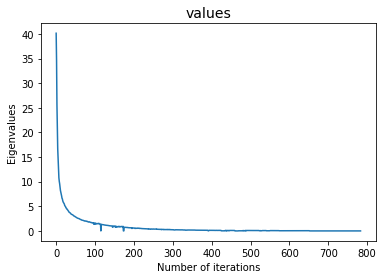

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in error function
plt.plot(values) 
plt.title("values",size=14)
plt.xlabel("Number of iterations") 
plt.ylabel("Eigenvalues") 
plt.show() 

In [ ]:
explained_variances = []
for i in range(len(values)):
    explained_variances.append(values[i] / np.sum(values))
 
print(np.sum(explained_variances), '\n', explained_variances)

0.9999999999999999 
 [0.06154544460938348, 0.05302918678784574, 0.039301277019571576, 0.031431173339635084, 0.025508368264079654, 0.022366722897475582, 0.01967630479772998, 0.016541368396243233, 0.015426873898577727, 0.01465602315109219, 0.013597821447605109, 0.012591159653302628, 0.012070944487248922, 0.011401580741962248, 0.01088662751537166, 0.010191845922814594, 0.009942905812029437, 0.009351460530755392, 0.009000044368366128, 0.008771409759400758, 0.00851150606925797, 0.008366553552069693, 0.007886454184712382, 0.007727777303628831, 0.007576327044221013, 0.0072308105264997855, 0.007121653567856992, 0.006849941398945168, 0.006807764904773605, 0.006592045838148387, 0.006462564309314549, 0.006250232598040322, 0.006113329196777223, 0.0058599101081489875, 0.005780482265827163, 0.00571737442526869, 0.005594324450205395, 0.00549661247785171, 0.005297509481864915, 0.005187110943098006, 0.005145888350243224, 0.005093578225634018, 0.005037777046577564, 0.004960332034009728, 0.00485684676507

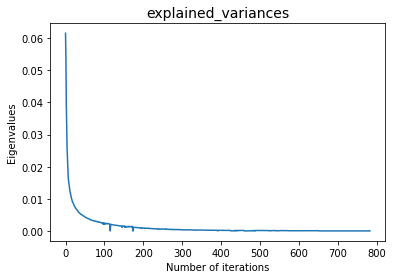

In [ ]:
import matplotlib.pyplot as plt
#visualizing the change in error function
plt.plot(explained_variances) 
plt.title("explained_variances",size=14)
plt.xlabel("Number of iterations") 
plt.ylabel("Eigenvalues") 
plt.show() 

In [ ]:
cum_var_explained = np.cumsum(explained_variances)

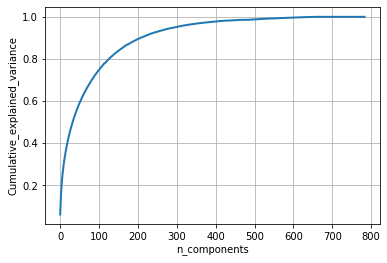

In [ ]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.title('Number of dimensions required to maintain original data.')
plt.grid()
plt.xlabel('Number of dimensions')
plt.ylabel('Cumulative_explained_variance')
plt.show()

As per the 'Cumulative_explained_variance' graph shown above, we see that
we need to use about 300 dimensions in PCA in order to keep 98% of the total variance in
data.

In [ ]:
vectors.shape

(784, 784)

In [ ]:
Xnew = X @ vectors

In [ ]:
print(Xnew.shape)
print(X.shape)

(17958, 784)
(17958, 784)


In [ ]:
import plotly.graph_objects as go

In [ ]:
lambdas, vs = values, vectors

W = vs[:,0:2]  # just keep two dimensions
proj_digits = X @ W
print("proj_digits.shape = ", proj_digits.shape)

# Make the plot 
fig = go.Figure(data=[go.Scatter(x=proj_digits[:,0], y=proj_digits[:,1],# z=Y, #z=proj_digits[:,2],
                mode='markers', marker=dict(size=6, opacity=0.7, color=Y), text=['digit='+str(j) for j in Y] )])
fig.update_layout( xaxis_title="q_1", yaxis_title="q_2", yaxis = dict(scaleanchor = "x",scaleratio = 1) )
fig.update_layout(scene_camera=dict(up=dict(x=0, y=0, z=1), center=dict(x=0, y=0, z=0), eye=dict(x=0, y=0, z=1.5)))
fig.show()

proj_digits.shape =  (17958, 2)


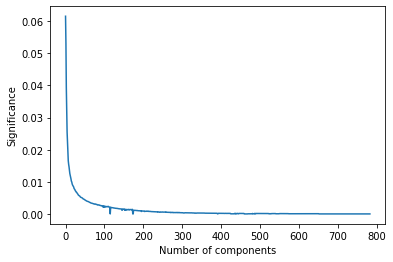

In [ ]:
plt.plot( np.abs(lambdas)/np.sum(lambdas) )
plt.xlabel('Number of components')
plt.ylabel('Significance') 
plt.show()

In [ ]:
distortion_error = (X - Xnew).T @ (X - Xnew)

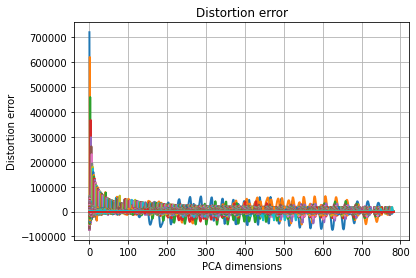

In [ ]:
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(distortion_error, linewidth=2)
plt.axis('tight')
plt.title('Distortion error')
plt.grid()
plt.xlabel('PCA dimensions')
plt.ylabel('Distortion error')
plt.show()

## Linear Discriminant Analysis (LDA)

In [ ]:
X.shape

(17958, 784)

In [ ]:
Y.shape

(17958,)

In LDA, we can only use a maximum of 3 dimensions since we have only 3 class labels.
Hence, using LDA, we would be able to separate the three classes in a maximum of 3
dimensions.


(784, 784)
(20942, 2)


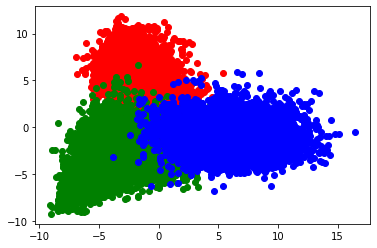

Original Data Size: (20942, 784) 
Modified Data Size: (20942, 2)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class LDA:
    def __init__(self, n_components=None):
        self.n_components = n_components
        self.eig_vectors = None
    
    def transform(self,X,y):
        height, width = X.shape
        unique_classes = np.unique(y)
        num_classes = len(unique_classes)

        scatter_t = np.cov(X.T)*(height - 1)
        scatter_w = 0
        for i in range(num_classes):
            class_items = np.flatnonzero(y == unique_classes[i])
            scatter_w = scatter_w + np.cov(X[class_items].T) * (len(class_items)-1)
        
        scatter_b = scatter_t - scatter_w
        _, eig_vectors = np.linalg.eigh(np.linalg.pinv(scatter_w).dot(scatter_b))
        print(eig_vectors.shape)
        pc = X.dot(eig_vectors[:,::-1][:,:self.n_components])
        print(pc.shape)

        if self.n_components == 2:
            if y is None:
                plt.scatter(pc[:,0],pc[:,1])
            else:
                colors = ['r','g','b']
                labels = np.unique(y)
                for color, label in zip(colors, labels):
                    class_data = pc[np.flatnonzero(y==label)]
                    plt.scatter(class_data[:,0],class_data[:,1],c=color)
            plt.show()
        return pc

LDA_object = LDA(n_components=2)
Xmod = LDA_object.transform(X, Y)

print("Original Data Size:",X.shape, "\nModified Data Size:", Xmod.shape)

Comparing the two data visualization methods, we see that the PCA method has a more
spread out and overlapping visualization for the data point. This is because the PCA
algorithm does not classify the data well based on their class labels. On the other hand, LDA
is able to classify the data in a better way. We see that in LDA, we have more
compact grouping of classes in the graph.